In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
cancer_dataset = load_breast_cancer()

In [3]:
print(f"Ключи cancer_dataset: \n{cancer_dataset.keys()}")

Ключи cancer_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(f"Первые пять строк массива data: \n {cancer_dataset['data'][:5]}")

Первые пять строк массива data: 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3

In [5]:
print(f"Форма массива target: \n {cancer_dataset['target'].shape}")

Форма массива target: 
 (569,)


In [6]:
print(f"Все классы: \n {cancer_dataset['target_names']}")

Все классы: 
 ['malignant' 'benign']


In [7]:
print(f"первые 50 ответов: \n {cancer_dataset['target'][:50]}")

первые 50 ответов: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_dataset['data'], 
    cancer_dataset['target'],
    random_state = 0)

In [10]:
print(f"форма массива X_train: \n {X_train.shape}")
print(f"форма массива y_train: \n {y_train.shape}")

форма массива X_train: 
 (426, 30)
форма массива y_train: 
 (426,)


In [12]:
print(f"форма массива X_test: \n {X_test.shape}")
print(f"форма массива y_test: \n {y_test.shape}")

форма массива X_test: 
 (143, 30)
форма массива y_test: 
 (143,)


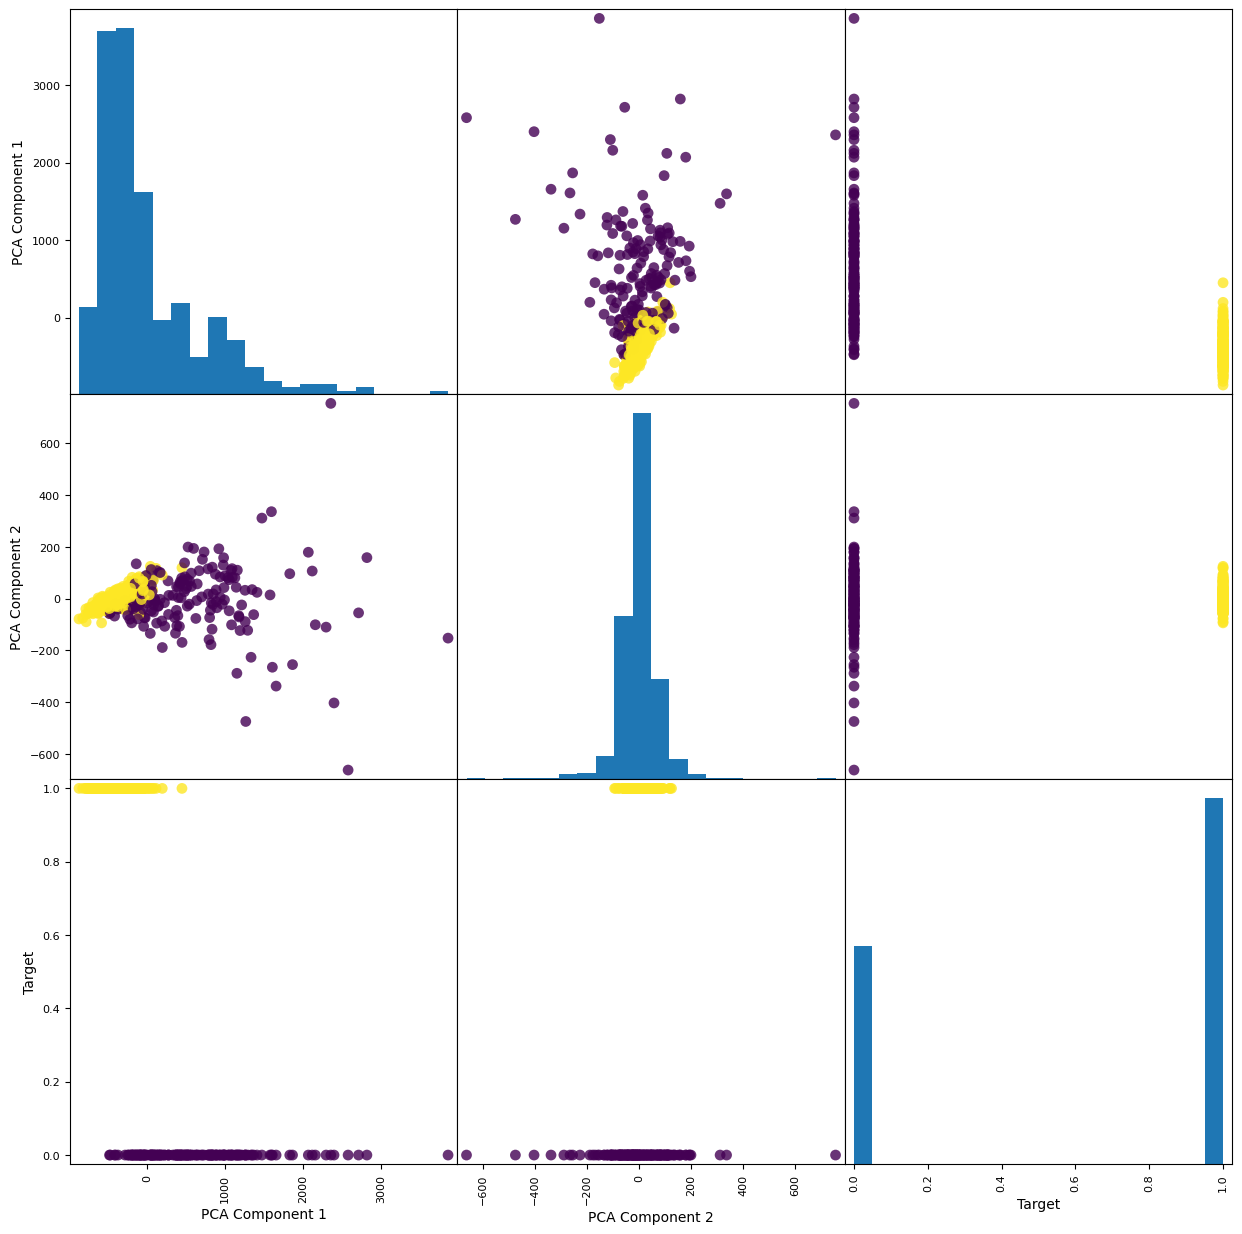

In [14]:
pca = PCA(n_components=2)  # Указываем, что хотим получить 2 компоненты

X_pca = pca.fit_transform(X_train)

pca_dataframe = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
pca_dataframe['Target'] = y_train

# Строим матрицу диаграмм рассеяния
scatter_matrix = pd.plotting.scatter_matrix(pca_dataframe, c=pca_dataframe['Target'], figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8)


# plt.tight_layout()
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
X_new = np.array([[1.185e+01, 1.746e+01, 7.554e+01, 4.327e+02, 8.372e-02, 5.642e-02,
       2.688e-02, 2.280e-02, 1.875e-01, 5.715e-02, 2.070e-01, 1.238e+00,
       1.234e+00, 1.388e+01, 7.595e-03, 1.500e-02, 1.412e-02, 8.578e-03,
       1.792e-02, 1.784e-03, 1.306e+01, 2.575e+01, 8.435e+01, 5.178e+02,
       1.369e-01, 1.758e-01, 1.316e-01, 9.140e-02, 3.101e-01, 7.007e-02]])
print(f"форма массива X_new: {X_new.shape}")
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(cancer_dataset['target_names'][prediction]))
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора: \n {}".format(y_pred))
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

форма массива X_new: (1, 30)
Прогноз: [1]
Спрогнозированная метка: ['benign']
Прогнозы для тестового набора: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
Правильность на тестовом наборе: 0.92
